<a href="https://colab.research.google.com/github/LY871/VENUS/blob/main/final_TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install library

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


#  EDA

In [2]:
import pandas as pd
import requests
from io import StringIO

# رابط CSV مباشر لجميع بيانات TOI
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=toi&select=*&format=csv"

# جلب البيانات
response = requests.get(url)
data = StringIO(response.text)

# تحويلها إلى DataFrame
df = pd.read_csv(data)

df.head()


,tid,tidstr,toi,toipfx,toipfxstr,ctoi_alias,ctoi_aliasstr,pl_pnum,tfopwg_disp,st_tmag,...,st_raderr2,st_radsymerr,st_radlim,st_radstr,sectors,toi_created,rowupdate,release_date,spt_ind,htm20
0,16288184,TIC 16288184,1049.01,1049,TOI-1049,1.628818e+07,TIC 16288184.01,1,KP,11.0657,...,-0.063558,1,0,1.27146005630493&plusmn;0.0635578,NaN,2019-07-15 19:20:04,2022-03-30 16:02:02,2025-09-28 22:48:44,122223033,11730628983781
1,144065872,TIC 144065872,105.01,105,TOI-105,1.440659e+08,TIC 144065872.01,1,KP,9.4995,...,-0.059699,1,0,1.2382400035858154&plusmn;0.0596985,NaN,2018-09-05 18:49:20,2025-03-25 16:00:01,2025-09-28 22:48:44,133031313,12978802532301
2,66818296,TIC 66818296,1050.01,1050,TOI-1050,6.681830e+07,TIC 66818296.01,1,KP,11.0261,...,-0.090000,1,0,1.57&plusmn;0.09,NaN,2019-07-15 19:20:05,2022-10-05 10:10:01,2025-09-28 22:48:44,123320312,12063953842363
3,259863352,TIC 259863352,1051.01,1051,TOI-1051,2.598634e+08,TIC 259863352.01,1,FA,7.1278,...,-0.186629,1,0,1.56486&plusmn;0.186629,NaN,2019-08-16 20:20:45,2024-09-17 10:08:02,2025-09-28 22:48:44,101330020,9329270267834
4,317060587,TIC 317060587,1052.01,1052,TOI-1052,3.170606e+08,TIC 317060587.01,1,CP,9.0197,...,-0.165123,1,0,1.58&plusmn;0.165123,NaN,2019-08-16 20:20:47,2023-07-24 12:03:31,2025-09-28 22:48:44,131013021,12400237322444


In [3]:
print(df.columns.tolist())

['tid', 'tidstr', 'toi', 'toipfx', 'toipfxstr', 'ctoi_alias', 'ctoi_aliasstr', 'pl_pnum', 'tfopwg_disp', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmagsymerr', 'st_tmaglim', 'st_tmagstr', 'ra', 'raerr1', 'raerr2', 'rasymerr', 'rastr', 'dec', 'decerr1', 'decerr2', 'decsymerr', 'decstr', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmrasymerr', 'st_pmralim', 'st_pmrastr', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdecsymerr', 'st_pmdeclim', 'st_pmdecstr', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidsymerr', 'pl_tranmidlim', 'pl_tranmidstr', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbpersymerr', 'pl_orbperlim', 'pl_orbperstr', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhsymerr', 'pl_trandurhlim', 'pl_trandurhstr', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandepsymerr', 'pl_trandeplim', 'pl_trandepstr', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radesymerr', 'pl_radelim', 'pl_radestr', 'pl_insol', 'pl_insolerr1', 'p

In [4]:
df.shape

(7703, 109)

In [5]:
## tfopwg_disp ---> target

# preprosesing

## handel miss value

### delet unusefl table

In [6]:
unimportant_features = [
    # Identifiers
    'toi',
    'toipfx',
    'tid',
    'ctoi_alias',

    # Sexagesimal / display columns
    'rastr',
    'decstr',
    'st_pmrastr',
    'st_pmdecstr',
    "spt_ind",
    "htm20"

]


In [7]:
df.drop(columns=unimportant_features, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 99 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tidstr             7703 non-null   object 
 1   toipfxstr          7703 non-null   object 
 2   ctoi_aliasstr      7703 non-null   object 
 3   pl_pnum            7703 non-null   int64  
 4   tfopwg_disp        7703 non-null   object 
 5   st_tmag            7703 non-null   float64
 6   st_tmagerr1        7703 non-null   float64
 7   st_tmagerr2        7703 non-null   float64
 8   st_tmagsymerr      7703 non-null   int64  
 9   st_tmaglim         7703 non-null   int64  
 10  st_tmagstr         7703 non-null   object 
 11  ra                 7703 non-null   float64
 12  raerr1             0 non-null      float64
 13  raerr2             0 non-null      float64
 14  rasymerr           0 non-null      float64
 15  dec                7703 non-null   float64
 16  decerr1            0 non

### delet data with one value

In [9]:
#
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) <= 2:
        print(f"Column: {col}, Unique Values: {unique_values}")
        df.drop(columns=[col], inplace=True)

Column: st_tmagsymerr, Unique Values: [1]
Column: st_tmaglim, Unique Values: [0]
Column: raerr1, Unique Values: [nan]
Column: raerr2, Unique Values: [nan]
Column: rasymerr, Unique Values: [nan]
Column: decerr1, Unique Values: [nan]
Column: decerr2, Unique Values: [nan]
Column: decsymerr, Unique Values: [nan]
Column: st_pmrasymerr, Unique Values: [ 1. nan]
Column: st_pmralim, Unique Values: [ 0. nan]
Column: st_pmdecsymerr, Unique Values: [ 1. nan]
Column: st_pmdeclim, Unique Values: [ 0. nan]
Column: pl_tranmidsymerr, Unique Values: [1]
Column: pl_tranmidlim, Unique Values: [0]
Column: pl_orbpersymerr, Unique Values: [1]
Column: pl_orbperlim, Unique Values: [0]
Column: pl_trandurhsymerr, Unique Values: [1]
Column: pl_trandurhlim, Unique Values: [0]
Column: pl_trandepsymerr, Unique Values: [1]
Column: pl_trandeplim, Unique Values: [0]
Column: pl_radesymerr, Unique Values: [1]
Column: pl_radelim, Unique Values: [0]
Column: pl_insolerr1, Unique Values: [nan]
Column: pl_insolerr2, Unique V

In [10]:
nan_counts = df.isnull().sum()

for name, count in nan_counts.items():
    if count > 0:
        print(name, "\t", count)


st_pmra 	 134
st_pmraerr1 	 134
st_pmraerr2 	 134
st_pmdec 	 134
st_pmdecerr1 	 134
st_pmdecerr2 	 134
pl_tranmiderr1 	 11
pl_tranmiderr2 	 11
pl_orbper 	 107
pl_orbpererr1 	 131
pl_orbpererr2 	 131
pl_orbperstr 	 107
pl_trandurherr1 	 13
pl_trandurherr2 	 13
pl_trandeperr1 	 6
pl_trandeperr2 	 6
pl_rade 	 506
pl_radeerr1 	 1623
pl_radeerr2 	 1623
pl_radestr 	 506
pl_insol 	 176
pl_insolstr 	 176
pl_eqt 	 311
pl_eqtstr 	 311
st_dist 	 215
st_disterr1 	 707
st_disterr2 	 707
st_diststr 	 215
st_teff 	 161
st_tefferr1 	 474
st_tefferr2 	 474
st_teffstr 	 161
st_logg 	 856
st_loggerr1 	 2271
st_loggerr2 	 2271
st_loggstr 	 856
st_rad 	 507
st_raderr1 	 1963
st_raderr2 	 1963
st_radstr 	 507


### delet row have may NAN value

In [11]:
df.dropna(subset=['st_pmra'], inplace=True)

### delet colum with 30% nan value

In [12]:

for name, count in nan_counts.items():
    if count > 3300:
        print(name, "\t", count)
        df.drop(columns=[name], inplace=True)


## Perprocess text data

### fill NAN value

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' has {df[col].size} string values.")

Column 'tidstr' has 7569 string values.
Column 'toipfxstr' has 7569 string values.
Column 'ctoi_aliasstr' has 7569 string values.
Column 'tfopwg_disp' has 7569 string values.
Column 'st_tmagstr' has 7569 string values.
Column 'pl_tranmidstr' has 7569 string values.
Column 'pl_orbperstr' has 7569 string values.
Column 'pl_trandurhstr' has 7569 string values.
Column 'pl_trandepstr' has 7569 string values.
Column 'pl_radestr' has 7569 string values.
Column 'st_diststr' has 7569 string values.
Column 'st_teffstr' has 7569 string values.
Column 'st_loggstr' has 7569 string values.
Column 'st_radstr' has 7569 string values.
Column 'toi_created' has 7569 string values.
Column 'rowupdate' has 7569 string values.


In [14]:
# الهم بديل رقمي
cols_to_drop = [
    'tidstr',
    'toipfxstr',
    'ctoi_aliasstr',
    'st_tmagstr',
    'pl_tranmidstr',
    'pl_orbperstr',
    'pl_trandurhstr',
    'pl_trandepstr',
    'st_diststr',
    'st_teffstr',
    'pl_radestr',
    'st_radstr',
    # غير مهم
    "toi_created",
    "rowupdate",
    'st_loggstr'
]

for col in df.columns.tolist():
  if col in cols_to_drop:


    df.drop(columns=col, inplace=True)

In [15]:
nan_counts = df.isnull().sum()

for name, count in nan_counts.items():
    if count > 0:
        print(name, "\t", count)


pl_tranmiderr1 	 11
pl_tranmiderr2 	 11
pl_orbper 	 107
pl_orbpererr1 	 131
pl_orbpererr2 	 131
pl_trandurherr1 	 13
pl_trandurherr2 	 13
pl_trandeperr1 	 6
pl_trandeperr2 	 6
pl_rade 	 415
pl_radeerr1 	 1525
pl_radeerr2 	 1525
pl_insol 	 139
pl_insolstr 	 139
pl_eqt 	 268
pl_eqtstr 	 268
st_dist 	 150
st_disterr1 	 573
st_disterr2 	 573
st_teff 	 117
st_tefferr1 	 420
st_tefferr2 	 420
st_logg 	 736
st_loggerr1 	 2144
st_loggerr2 	 2144
st_rad 	 416
st_raderr1 	 1862
st_raderr2 	 1862


In [16]:
df.shape

(7569, 44)

## fill nan vlue

### fill nan value

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
#encoder = LabelEncoder()
y_encoded = df["tfopwg_disp"]  # fit هنا

X = df.drop("tfopwg_disp", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [18]:
import pandas as pd
from sklearn.impute import KNNImputer

# الأعمدة التي نريد ملؤها باستخدام KNN
cols_to_impute = [
    'pl_tranmiderr1','pl_tranmiderr2','pl_trandurherr1','pl_trandurherr2',
    'pl_trandeperr1','pl_trandeperr2','pl_orbper','pl_orbpererr1','pl_orbpererr2',
    'pl_rade',
    'pl_insol','pl_eqt','st_dist','st_teff','st_rad',"st_logg"
]

# انسخ DataFrame الأصلي لتعديل النسخة فقط


# KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

# طبق الملء على الأعمدة المحددة
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# حذف الأعمدة ذات النسبة العالية من القيم المفقودة (>25%) لأنها غير مستقرة للملء
high_nan_cols = [
    'st_loggerr1','st_loggerr2',
    'st_raderr1','st_raderr2','st_loggstr', 'pl_insolstr', 'pl_eqtstr',    # نسخ نصية للقيم العددية
    'st_disterr1', 'st_disterr2',  # أخطاء/عدم يقين للمسافة
    'st_tefferr1', 'st_tefferr2'   # أخطاء/عدم يقين لدرجة حرارة النجم

]
df.drop(columns=high_nan_cols, inplace=True, errors='ignore')

# حذف الأعمدة النصية التي لا تفيد في ML

# تحقق من القيم المفقودة بعد التنظيف
print(df.isnull().sum())


pl_pnum               0
tfopwg_disp           0
st_tmag               0
st_tmagerr1           0
st_tmagerr2           0
ra                    0
dec                   0
st_pmra               0
st_pmraerr1           0
st_pmraerr2           0
st_pmdec              0
st_pmdecerr1          0
st_pmdecerr2          0
pl_tranmid            0
pl_tranmiderr1        0
pl_tranmiderr2        0
pl_orbper             0
pl_orbpererr1         0
pl_orbpererr2         0
pl_trandurh           0
pl_trandurherr1       0
pl_trandurherr2       0
pl_trandep            0
pl_trandeperr1        0
pl_trandeperr2        0
pl_rade               0
pl_radeerr1        1525
pl_radeerr2        1525
pl_insol              0
pl_eqt                0
st_dist               0
st_teff               0
st_logg               0
st_rad                0
dtype: int64


In [19]:
df.drop(columns=['pl_radeerr1','pl_radeerr2']  ,inplace=True)

## extract feature

tfopwg_disp
PC     4592
FP     1171
CP      683
KP      580
APC     451
FA       92
Name: count, dtype: int64


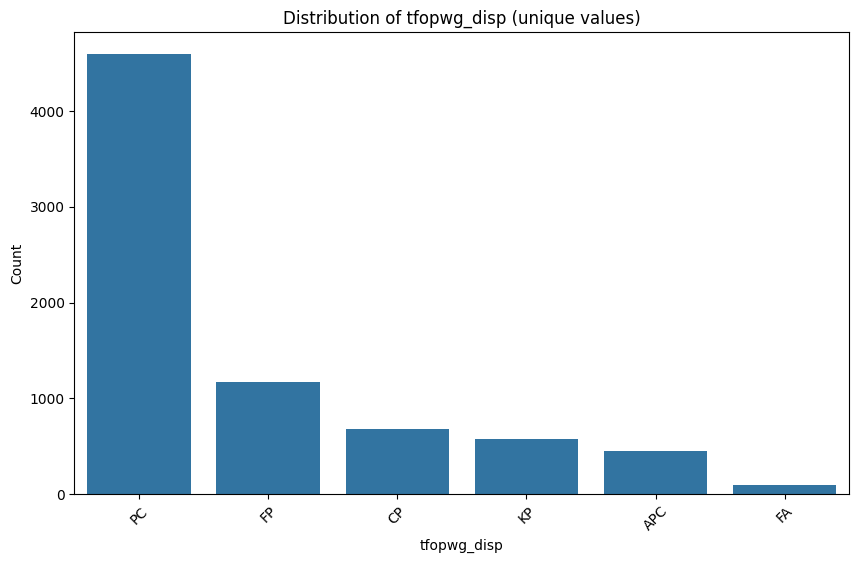

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# عدد كل قيمة فريدة
counts = df['tfopwg_disp'].value_counts()
print(counts)

# رسم بار للقيم الفريدة
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribution of tfopwg_disp (unique values)')
plt.xlabel('tfopwg_disp')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [21]:
print(df['tfopwg_disp'].value_counts())

tfopwg_disp
PC     4592
FP     1171
CP      683
KP      580
APC     451
FA       92
Name: count, dtype: int64


In [22]:
# خريطة التحويل
mapping = {
    'CP': 'Confirmed',
    'KP': 'Confirmed',
    'PC': 'Candidate',
    'APC': 'Candidate',
    'FP': 'False Positive',
    'FA': 'False Positive'
}

# تطبيق التحويل
df['tfopwg_disp'] = df['tfopwg_disp'].map(mapping)


In [23]:
df_clean = df[~df['tfopwg_disp'].isin(["Candidate"])]

tfopwg_disp
Confirmed         1263
False Positive    1263
Name: count, dtype: int64


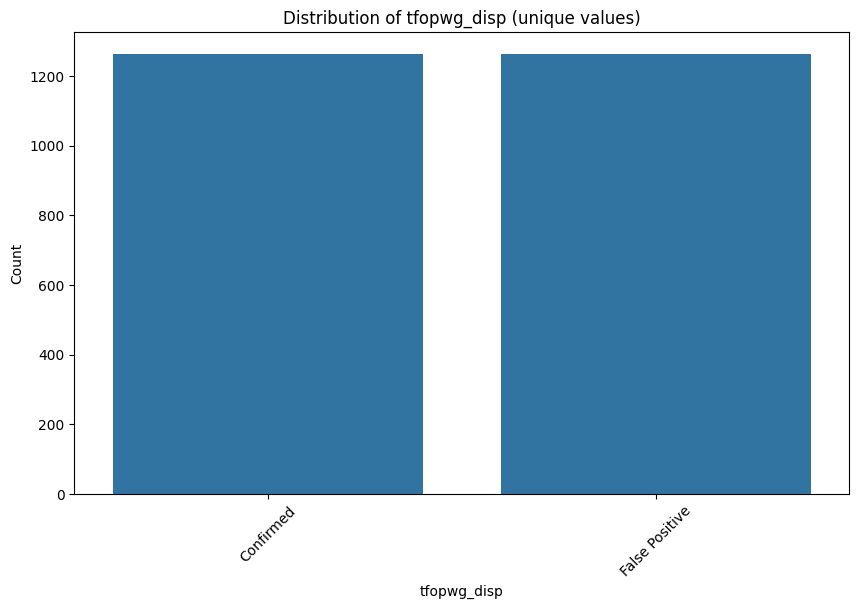

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# عدد كل قيمة فريدة
counts = df_clean['tfopwg_disp'].value_counts()
print(counts)

# رسم بار للقيم الفريدة
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribution of tfopwg_disp (unique values)')
plt.xlabel('tfopwg_disp')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [25]:
print(df_clean.columns.tolist())

['pl_pnum', 'tfopwg_disp', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_dist', 'st_teff', 'st_logg', 'st_rad']


## extract feature

In [26]:
'''from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# استخدمي DataFrame وليس numpy array
X_train_df = pd.DataFrame(X_train, columns=df_clean.drop("tfopwg_disp", axis=1).columns)

# نموذج لتقييم الأهمية
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# RFE لاختيار أهم 10 ميزات
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X_train_df, y_train)

# الميزات المختارة
selected_features = X_train_df.columns[rfe.support_]
print(selected_features)
'''

'from sklearn.feature_selection import RFE\nfrom sklearn.ensemble import RandomForestClassifier\nimport pandas as pd\n\n# استخدمي DataFrame وليس numpy array\nX_train_df = pd.DataFrame(X_train, columns=df_clean.drop("tfopwg_disp", axis=1).columns)\n\n# نموذج لتقييم الأهمية\nrf = RandomForestClassifier(n_estimators=200, random_state=42)\n\n# RFE لاختيار أهم 10 ميزات\nrfe = RFE(estimator=rf, n_features_to_select=10)\nrfe.fit(X_train_df, y_train)\n\n# الميزات المختارة\nselected_features = X_train_df.columns[rfe.support_]\nprint(selected_features)\n'

In [27]:
#selected_features

# train model

In [28]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df_clean["tfopwg_disp"])  # fit هنا

X = df_clean.drop("tfopwg_disp", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# الموديلات الأساسية
base_models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2,min_samples_leaf=1,max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=100, random_state=42 ,)),
    ('XGBoost', XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('CatBoost', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0, random_state=42))
]



# Stacking
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True  # تمرير المميزات الأصلية للموديل النهائي
)





In [29]:
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')

    labels = sorted(pd.unique(y_test))
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    print(f"\n{name}")
    print("-" * len(name))
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall:   {rec:.4f}")
    print("Confusion Matrix:")
    print(pd.DataFrame(cm, index=labels, columns=labels))



Random Forest
-------------
Accuracy: 0.8854
Recall:   0.8850
Confusion Matrix:
     0    1
0  236   28
1   30  212

Extra Trees
-----------
Accuracy: 0.8676
Recall:   0.8671
Confusion Matrix:
     0    1
0  232   32
1   35  207


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:01:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
-------
Accuracy: 0.8992
Recall:   0.8982
Confusion Matrix:
     0    1
0  243   21
1   30  212

CatBoost
--------
Accuracy: 0.9071
Recall:   0.9060
Confusion Matrix:
     0    1
0  246   18
1   29  213


In [30]:
stack_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:01:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:01:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:01:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:01:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:01:46] WARNING: /w

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('Extra Trees',
                                ExtraTreesClassifier(random_state=42)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x7826c6f86180>)],
                   final_estimator=LogisticRegression(max_iter=1000),
                   passthrough=True)

In [31]:
y_pred = stack_model.predict(X_test)

In [32]:
# تحويل الأرقام للنصوص الأصلية
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

acc = accuracy_score(y_test_labels, y_pred_labels)
rec = recall_score(y_test_labels, y_pred_labels, average='macro')
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)


In [33]:
acc = accuracy_score(y_test, y_pred)

rec = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Stacking Accuracy: {acc:.3f}, Recall: {rec:.3f}")
print(pd.DataFrame(cm))


Stacking Accuracy: 0.897, Recall: 0.896
     0    1
0  242   22
1   30  212


In [34]:
import joblib

# Save the trained model
joblib.dump(stack_model, "TESS_stacked_model.pkl")

# Optionally, save your scaler and encoder too
joblib.dump(scaler, "TESS_scaler.pkl")
joblib.dump(encoder, "TESS_encoder.pkl")

['TESS_encoder.pkl']

In [35]:
from google.colab import drive
drive.mount('/content/drive')

# Save model to your Google Drive
joblib.dump(stack_model, "/content/drive/MyDrive/stacked_modelTess.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/scalerTess.pkl")
joblib.dump(encoder, "/content/drive/MyDrive/encoderTess.pkl")

Mounted at /content/drive


['/content/drive/MyDrive/encoderTess.pkl']